In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-1-47e3bcc2019c>:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
# create data
N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

In [11]:

# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )

# learning rate
learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

###############################################################################################
# train the model
numepochs = 500
losses = torch.zeros(numepochs)
# Lists to store weights
weights_list = []

## Train the model!
for epochi in range(numepochs):

  # forward pass
  yHat = ANNreg(x)

  # compute loss
  loss = lossfun(yHat,y)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Append weights to list
  weights_list.append([param.data.numpy() for param in ANNreg.parameters()])

In [12]:
weights_list[0]

[array([[0.85389215]], dtype=float32),
 array([0.9782226], dtype=float32),
 array([[1.0286487]], dtype=float32),
 array([-0.56613225], dtype=float32)]

### Setting the lower bound to zero and leaving the upper bound undefined to give more visually intuition how good modle works

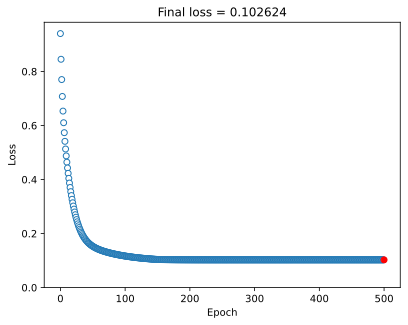

In [13]:
# show the losses

# manually compute losses
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(bottom=0) # Setting the lower bound to zero and leaving the upper bound undefined
plt.title('Final loss = %g' %testloss.item())
plt.show()

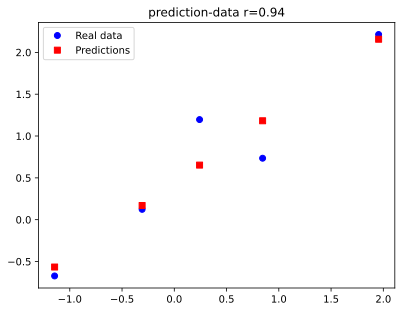

In [14]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

In [15]:
np.corrcoef(y.T,predictions.detach().T)

array([[1.       , 0.9444833],
       [0.9444833, 1.       ]])

### Practice

In [16]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets.
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
#
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
#
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.

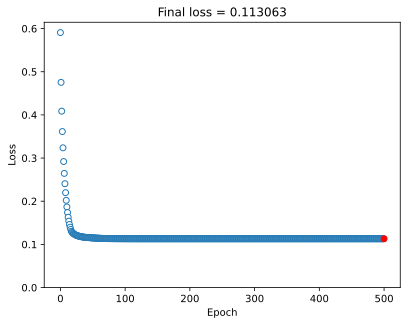

In [17]:
# create data
N = 5
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2


numepochs = 500
losses = torch.zeros(numepochs)

## Train the model!
for epochi in range(numepochs):

  # forward pass
  yHat = ANNreg(x)

  # compute loss
  loss = lossfun(yHat,y)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(bottom=0)
plt.title('Final loss = %g' %testloss.item())
plt.show()

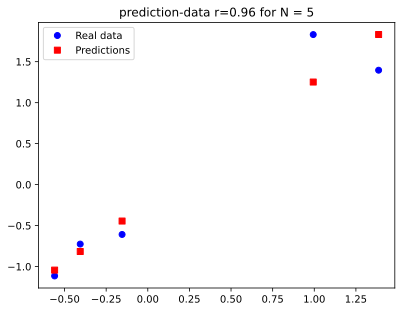

In [18]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f} for N = {N}')
plt.legend()
plt.show()

### Modifying the random portion of the code from 2 to 3

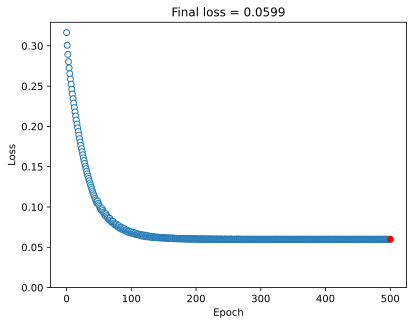

In [23]:
# create data
N = 5
x = torch.randn(N,1)
y = x + torch.randn(N,1)/3


numepochs = 500
losses = torch.zeros(numepochs)

## Train the model!
for epochi in range(numepochs):

  # forward pass
  yHat = ANNreg(x)

  # compute loss
  loss = lossfun(yHat,y)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(bottom=0)
plt.title('Final loss = %g' %testloss.item())
plt.show()

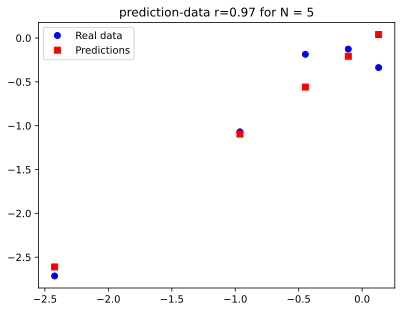

In [24]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f} for N = {N}')
plt.legend()
plt.show()

# Repeat 200 times and plot histogram of losses

In [36]:
N = 30
testloss = torch.zeros(200)
for i in range(200):
  # create data
  x = torch.randn(N,1)
  y = x + torch.randn(N,1)/2


  numepochs = 200


  ## Train the model!
  for epochi in range(numepochs):

    # forward pass
    yHat = ANNreg(x)

    # compute loss
    loss = lossfun(yHat,y)
    losses = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


  predictions = ANNreg(x)

  # final loss (MSE)
  testloss [i] = (predictions-y).pow(2).mean()


In [37]:
sum(testloss.detach()<.25)/200

tensor(0.6250)

Text(0, 0.5, 'PDF')

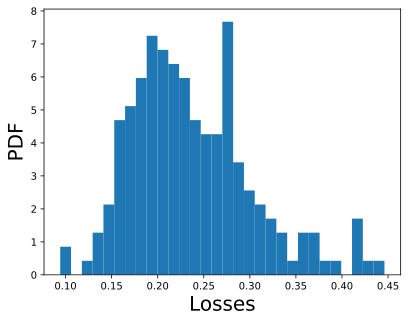

In [42]:
plt.hist(testloss.detach(),30, density = True);


plt.xlabel('Losses',fontsize= 20)
plt.ylabel('PDF',fontsize= 20)